# Example 4 : Plotting with Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) is a Python package designed to visualize data using different statistical methods. Anything that seaborn can do, you can do with matplotlib and a little bit of numpy or scipy. That being said, you should not consider seaborn an "alternative" to matplotlib (especially since seaborn is built on top of matplotlib). Rather, think of seaborn as a collection of "plotting macros" that make certain types of plots much easier to do.

In this notebook, I will run through a couple of different plotting functions in seaborn to give you some ideas of what kinds of plots you can make of MUSIC data. Most of what I will be showing here builds off the great [examples directly from the Seaborn website](https://seaborn.pydata.org/examples/index.html). First, let's do our standard first imports and some things to make the plots a little nicer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200 # bigger figures

# Use more REVTEX-esque fonts
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIXGeneral"
mpl.rcParams["mathtext.fontset"] = "stix"

Let's grab our ROOT data and setup the dataframe.

In [2]:
import uproot

In [3]:
file = uproot.open("test_music_data.root")
tree = file['tree']
branches = tree.arrays()

# set up dictionary
dict_branches = {}
# strip0 first
dict_branches.update({'s0':branches['strip0'][branches['seg'] == 1]})
# segmented anode, left first then right
for i in range(1,17):
    dict_branches.update({'s%iL' % i : branches['edepl'][branches['seg'] == i]})
    dict_branches.update({'s%iR' % i  : branches['edepr'][branches['seg'] == i]})
# strip17
dict_branches.update({'s17':branches['strip17'][branches['seg'] == 1]})
# grid last
dict_branches.update({'grid':branches['grid'][branches['seg'] == 1]})

# dataframe
df = pd.DataFrame(dict_branches)

df

,s0,s1L,s1R,s2L,s2R,s3L,s3R,s4L,s4R,s5L,...,s13L,s13R,s14L,s14R,s15L,s15R,s16L,s16R,s17,grid
0,1003.0,366.0,50.0,35.0,366.0,387.0,33.0,42.0,335.0,377.0,...,463.0,34.0,35.0,457.0,462.0,33.0,49.0,445.0,402.0,1522.0
1,1091.0,356.0,41.0,37.0,366.0,376.0,32.0,36.0,361.0,368.0,...,429.0,37.0,41.0,522.0,470.0,32.0,40.0,482.0,380.0,1468.0
2,1083.0,364.0,62.0,36.0,359.0,371.0,35.0,38.0,372.0,365.0,...,447.0,37.0,38.0,501.0,471.0,32.0,39.0,483.0,402.0,1421.0
3,1002.0,362.0,43.0,37.0,341.0,359.0,35.0,37.0,380.0,411.0,...,436.0,36.0,37.0,442.0,470.0,33.0,37.0,467.0,400.0,1450.0
4,1015.0,352.0,41.0,37.0,361.0,377.0,33.0,39.0,382.0,409.0,...,444.0,33.0,37.0,441.0,442.0,34.0,43.0,463.0,366.0,1487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267824,1040.0,338.0,63.0,36.0,360.0,381.0,37.0,36.0,377.0,419.0,...,425.0,39.0,33.0,434.0,419.0,35.0,39.0,459.0,403.0,1592.0
267825,969.0,325.0,41.0,36.0,360.0,387.0,35.0,36.0,363.0,406.0,...,437.0,38.0,36.0,460.0,448.0,34.0,38.0,479.0,384.0,1559.0
267826,958.0,327.0,49.0,40.0,355.0,362.0,32.0,37.0,361.0,401.0,...,423.0,36.0,34.0,447.0,420.0,36.0,46.0,451.0,398.0,1439.0
267827,1006.0,344.0,39.0,41.0,330.0,395.0,35.0,36.0,364.0,419.0,...,436.0,35.0,39.0,459.0,456.0,33.0,53.0,389.0,393.0,1524.0


## 1D Histograms

Seaborn has a built-in function to plot 1D histograms. With most seaborn functions, there is an expectation to work with data already in a dataframe or numpy array. Then, once you tell seaborn what dataframe/ndarray you want to pull data from you can pick which column to plot using the column name. Let's plot a 1D histogram of the Frisch grid.

In [4]:
import seaborn as sns

<Axes: xlabel='grid', ylabel='Count'>

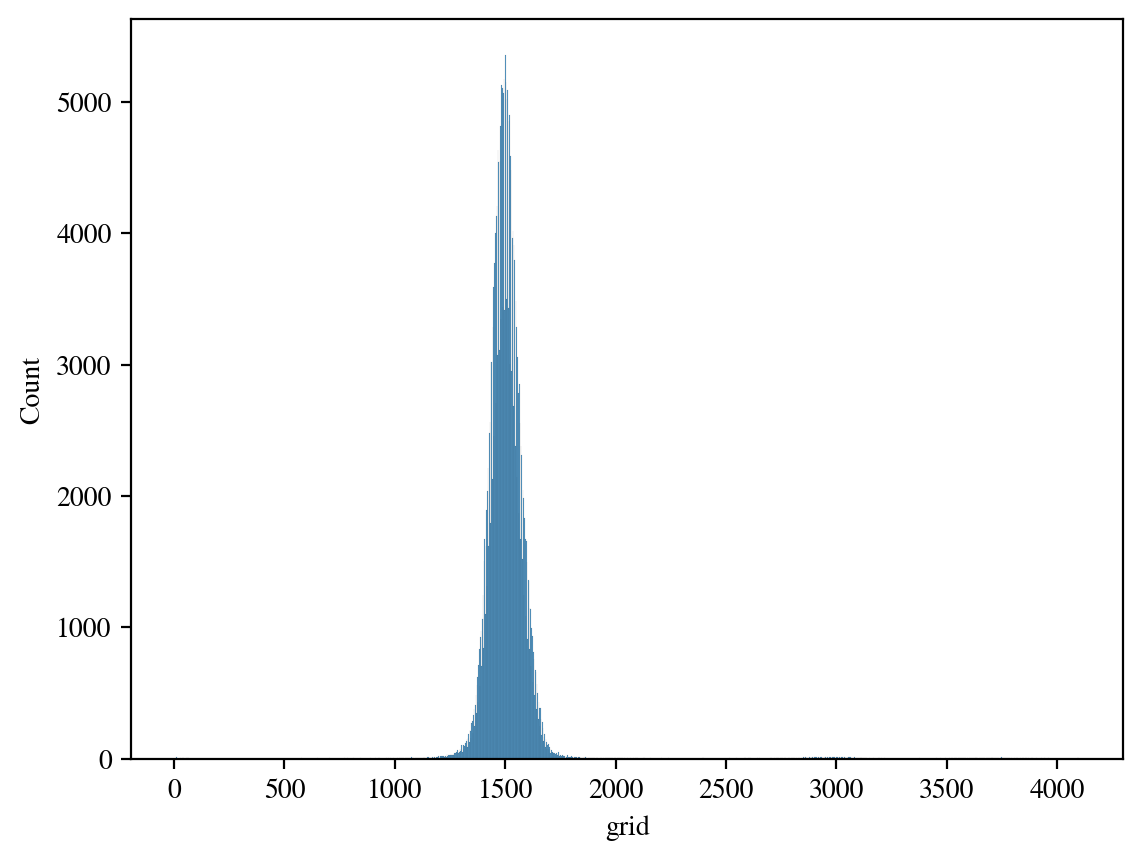

In [5]:
sns.histplot(data=df, x='grid')

We can see seaborn has determined the number of bins to use. By default seaborn uses the 'auto' method from numpy.histogram_bin_edges() to determine the bin width and number of bins to use. However, just like with plt.hist() in seaborn you can freely choose to either specifiy the number of bins or use any other method from numpy.histogram_bin_edges().

In addition to the function arguments, it should be noted seaborn functions return matplotlib objects (often a patch or axes object). So, we can add in some matplotlib to add things like titles or save the figure etc... Here's an example with more of the options used.

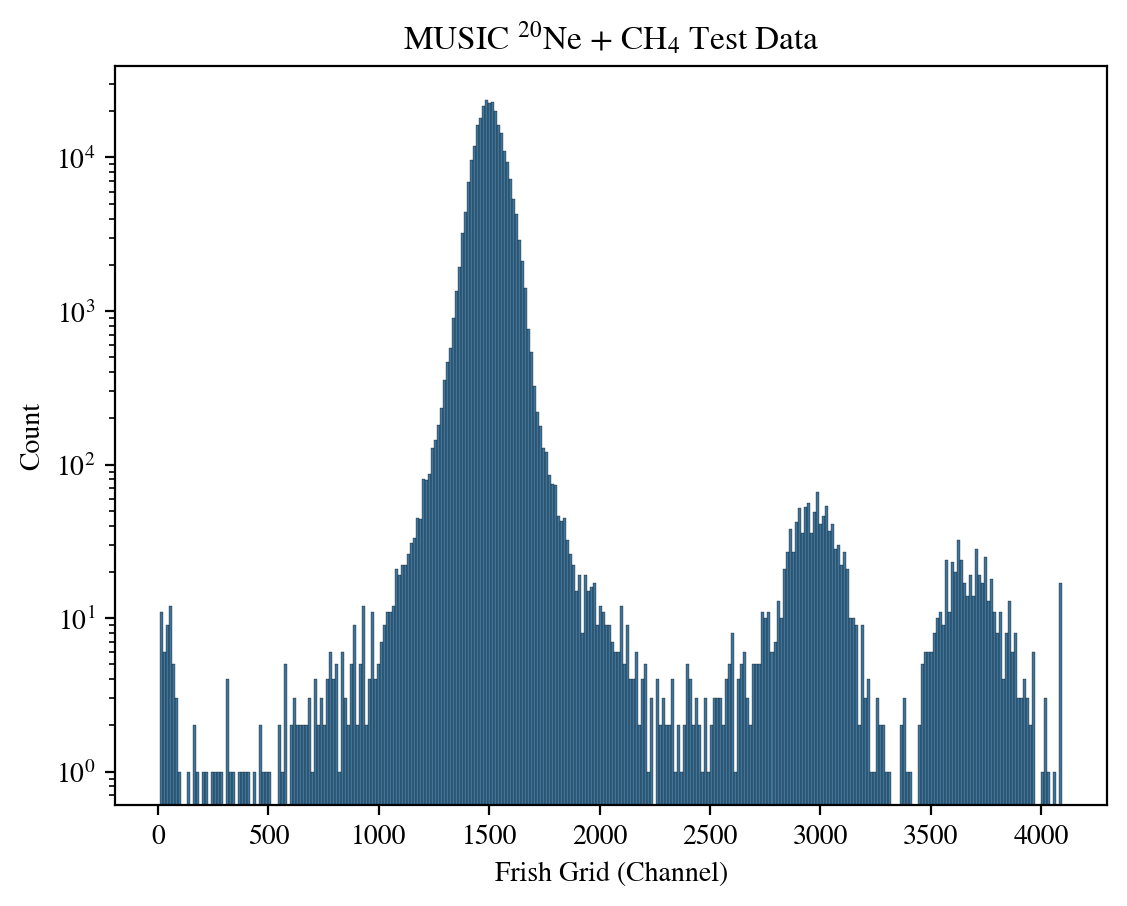

In [21]:
plt.title(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Data')
ax = sns.histplot(data=df, x='grid',
                  bins=300,
                  color='xkcd:prussian blue')
ax.set_xlabel('Frish Grid (Channel)')
ax.set_yscale('log')

plt.show()

## 2D Histograms

In seaborn, you can use the same function to plot a 2D histogram by passing a column name to the y data argument. We also have options to set the range, change the normalization, and add a colorbar as well.

In [8]:
from matplotlib.colors import LogNorm

<Axes: xlabel='grid', ylabel='s0'>

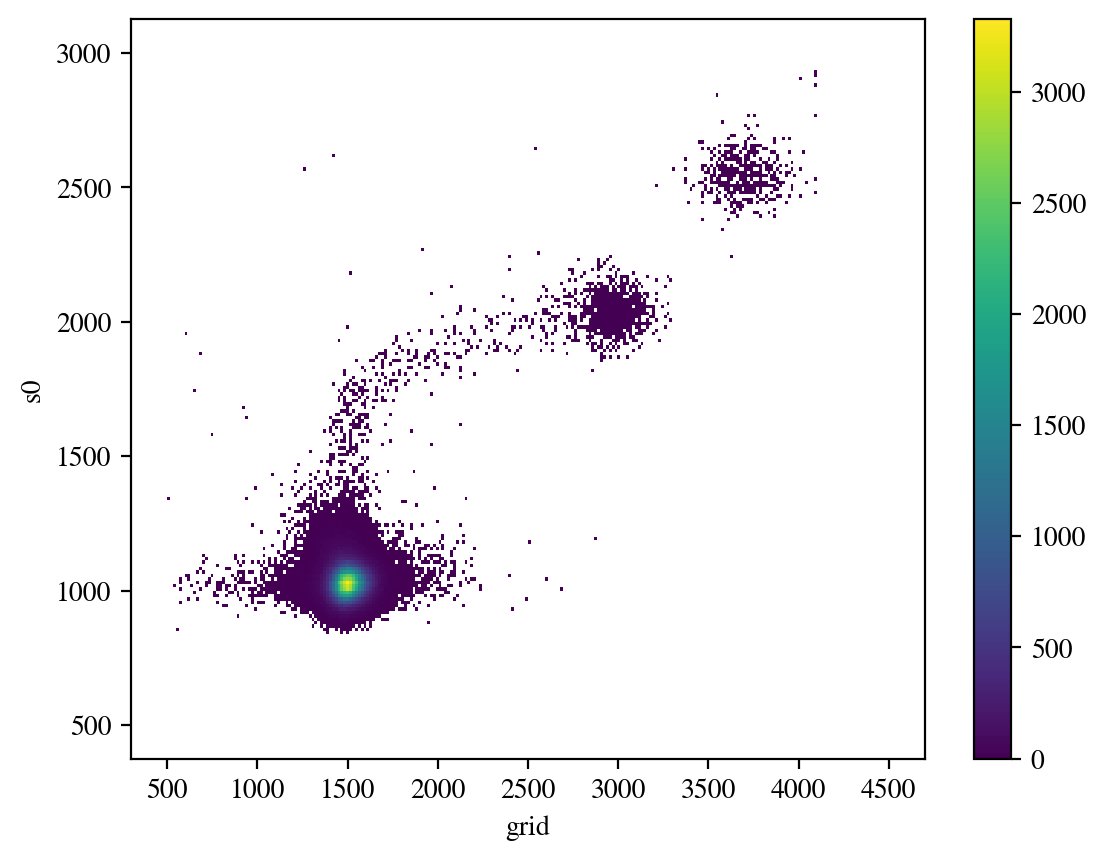

In [9]:
sns.histplot(data=df, x='grid', y='s0',
             bins=(250,200),
             binrange=[[500,4500],[500,3000]],
             cbar=True,
             cmap='viridis',
             hue_norm=LogNorm())

## Joint plots

Sometimes when you are plotting a 2D distribution you want to see the individual 1D histograms along each axis. In seaborn the jointplot() function is designed to just that. Let's plot an example using strip 0 and the Frisch grid. Here we can also show the jointplot() doesn't return a matplotlib axes object like the histplot() function. Rather jointplot() creates a 'joint grid object' but this object does have attributes which are matplotlib axes objects. In the plot below notice the different way we access the axes labels.

C:\Users\daneto\AppData\Local\Temp\ipykernel_2380\3093445022.py:9: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


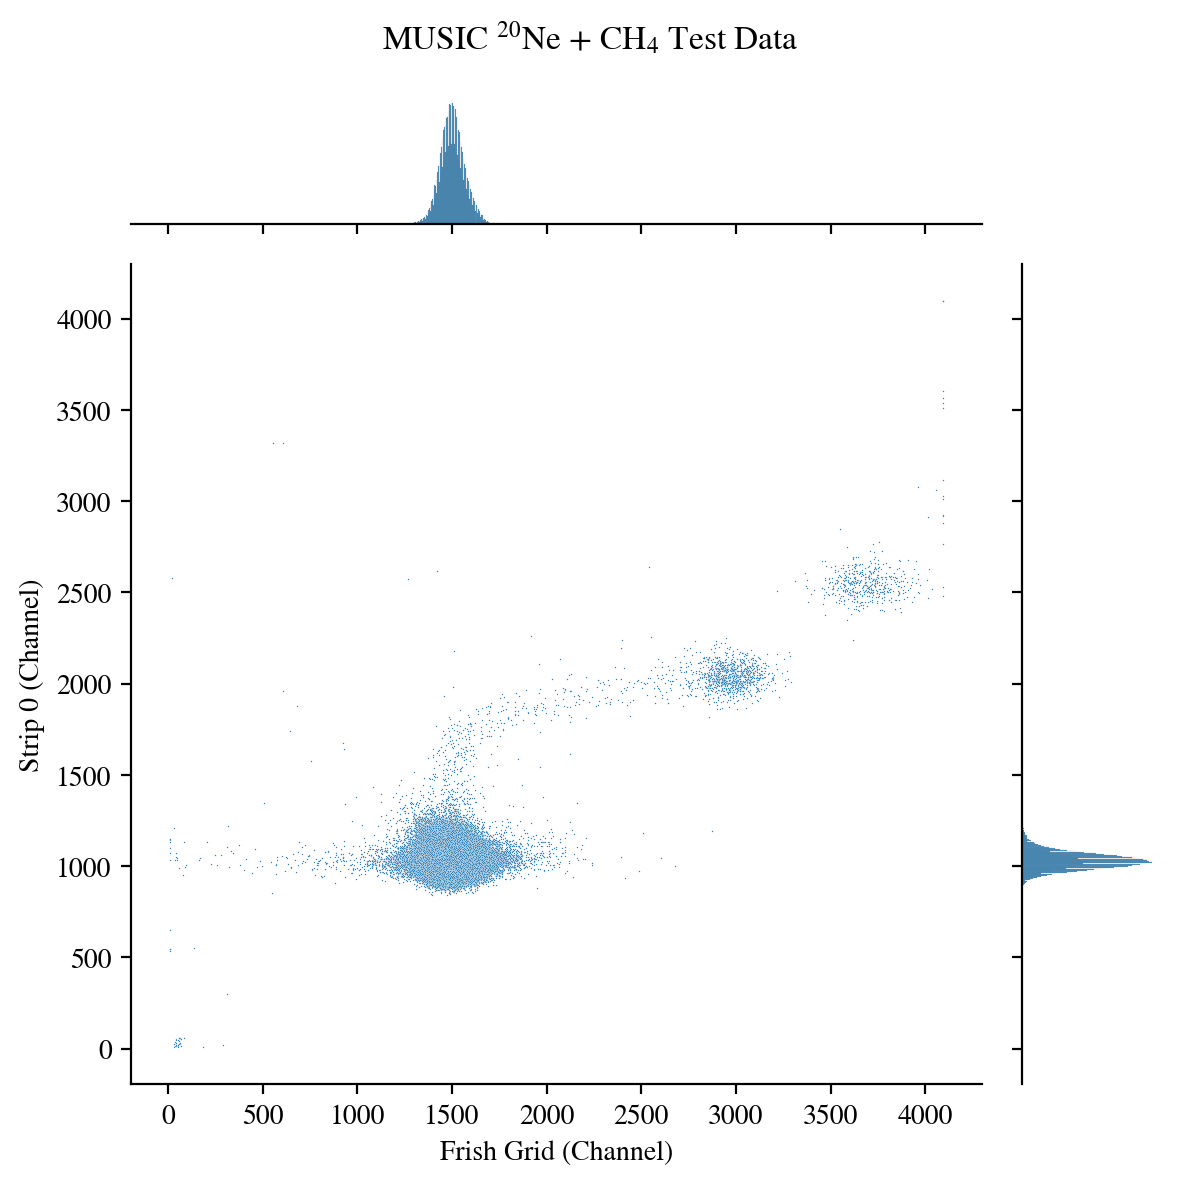

In [36]:
g = sns.jointplot(data=df, x='grid', y='s0',
                   kind='scatter', # main plot is scatter plot
                   marker='.',
                   s=1)
g.fig.suptitle(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Data')
g.ax_joint.set_xlabel('Frish Grid (Channel)')
g.ax_joint.set_ylabel('Strip 0 (Channel)')

g.fig.tight_layout()

This gives a general idea of what these types of plots look like. However, using a lot of the default options leaves much to desire. Luckily, using the [jointplot() documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) we can see there are keywords for changing pretty much everything in the plot. If we want to access the options of the histograms we can add a dictionary with marginal_kws. Using this information we can make this plot a little nicer to look at.

C:\Users\daneto\AppData\Local\Temp\ipykernel_2380\473995784.py:15: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


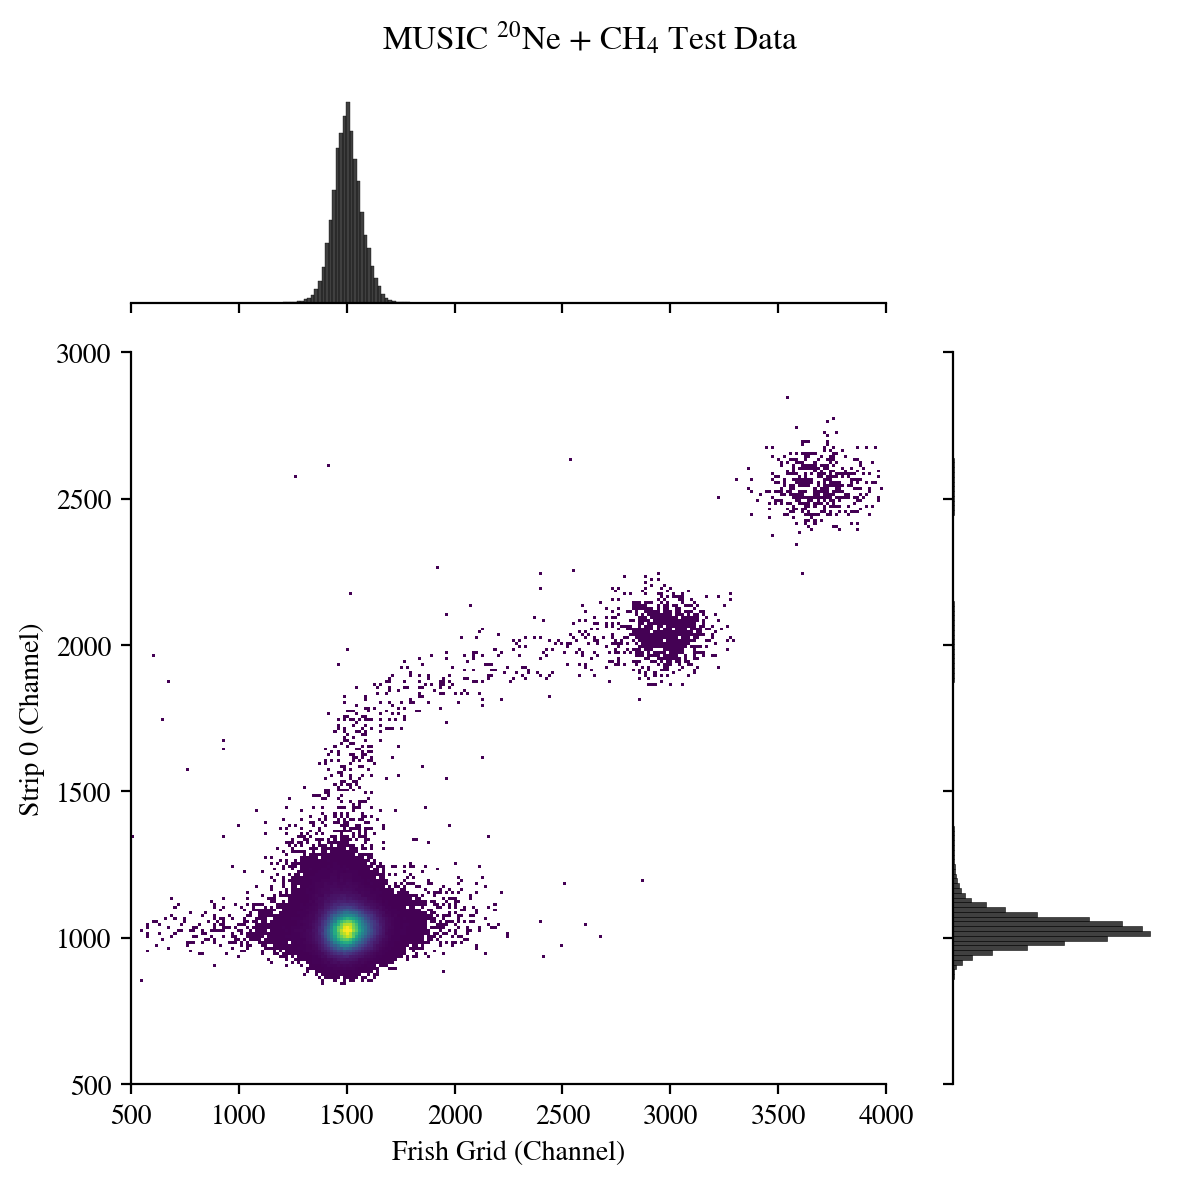

In [49]:
g = sns.jointplot(data=df, x='grid', y='s0',
                  kind='hist', # make center plot a histogram
                  bins=250,
                  binrange=[[500,4000],[500,3000]],
                  cmap='viridis',
                  hue_norm=LogNorm(),
                  ratio=3, # set center plot height = 3 time height of marginal plot
                  xlim=(500, 4000),
                  ylim=(500, 3000),
                  marginal_kws={'bins': 250, 'color': 'k'}) # changing the display options of the marginal histograms
g.fig.suptitle(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Data')
g.ax_joint.set_xlabel('Frish Grid (Channel)')
g.ax_joint.set_ylabel('Strip 0 (Channel)')

g.fig.tight_layout()

## KDE plots

## Pair plots

The seaborn pairplot() function allows you to plot 'corner' style plots of a set of varibles across the differnet possible combinations. One thing to be mindful of is plotting too many variables will generate a huge plot which will have very tiny features. Generally, it is good to stick to 2 - 5 variables. In a previous example, we made use of the fact that a cut in strip 17 was useful in removing unreacted beam. In a pair plot we can show strip 0, strip 17 and the Frisch grid as a corner style plot of histograms.

C:\Users\daneto\anaconda3\envs\music_py\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


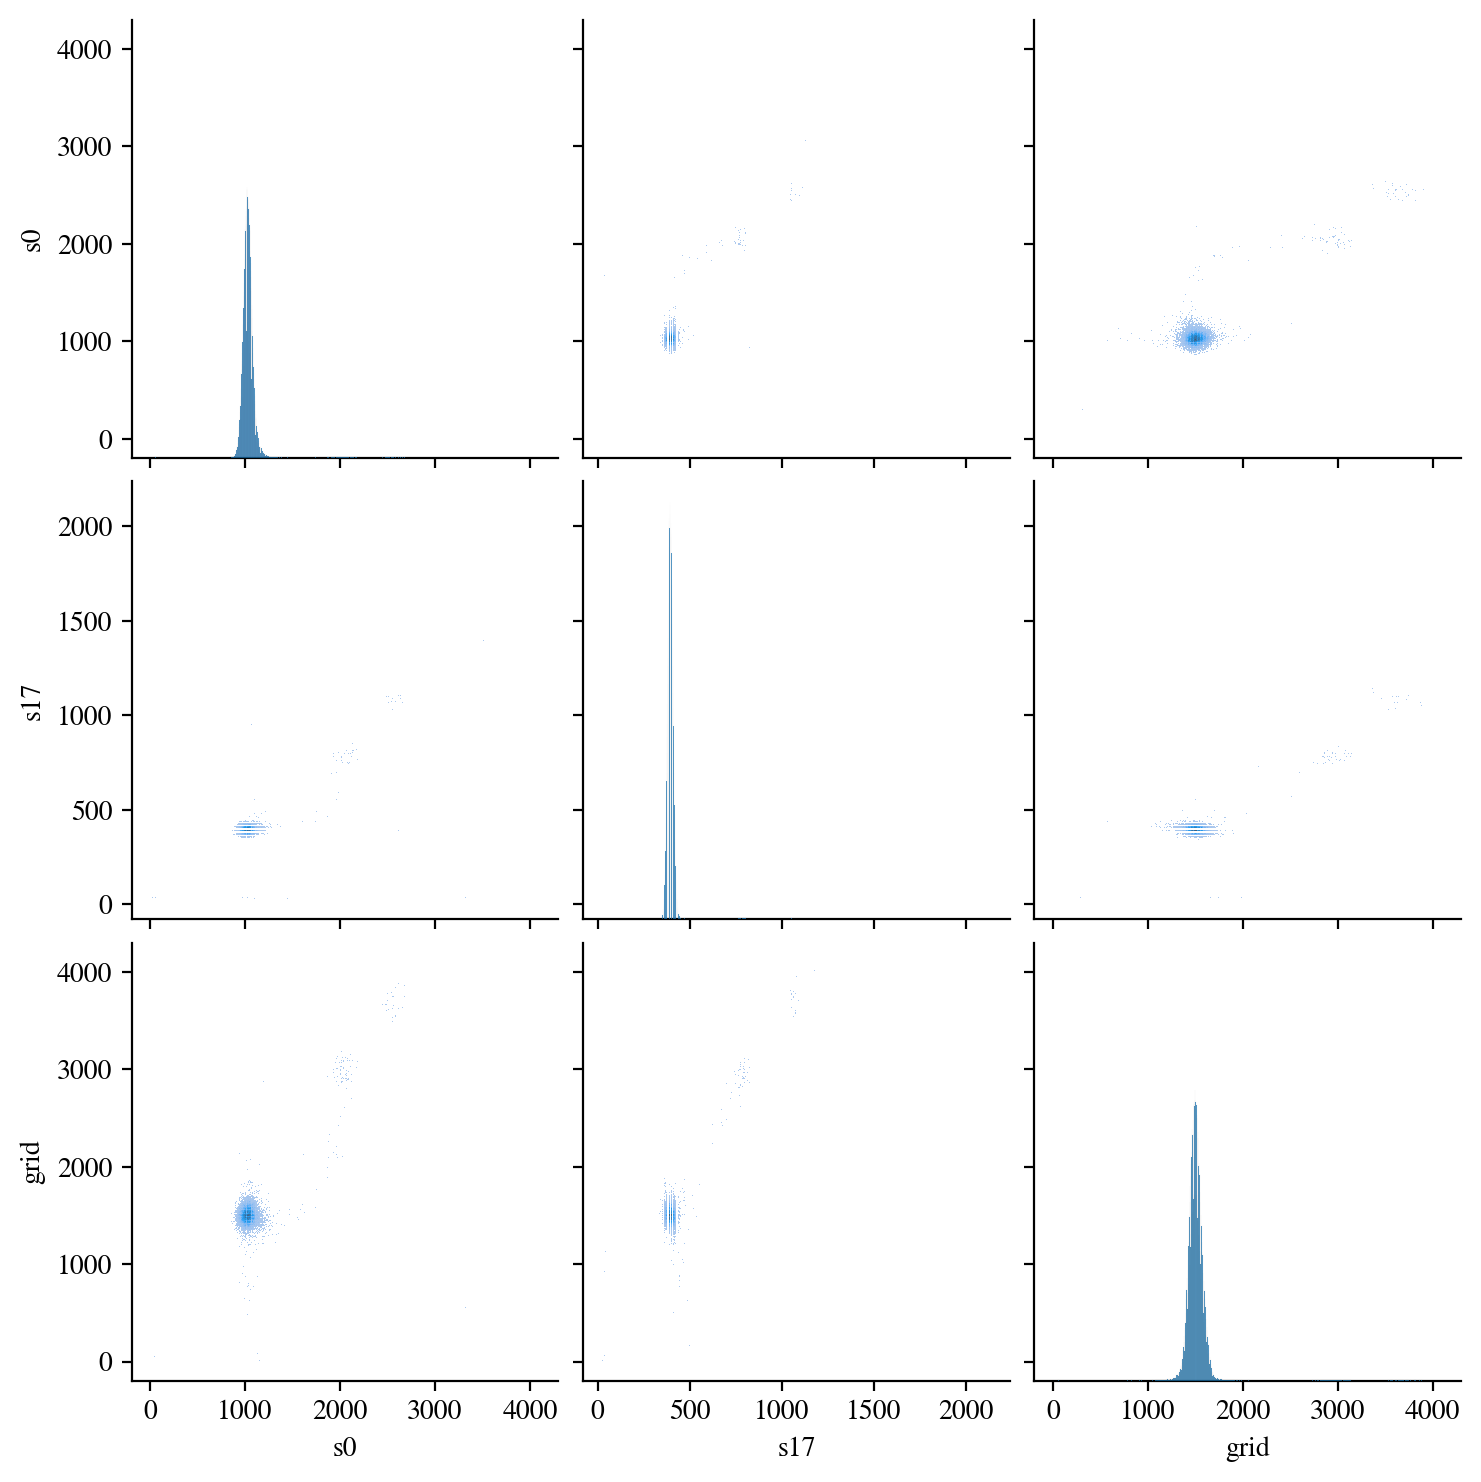

In [50]:
sns.pairplot(df, vars=['s0','s17','grid'], kind='hist')

First off, this plot was not particularly fast to complete. For large data sets (or for lots of variables) this is not that efficient, this is probably something to try with a subset of your data or after applying cuts on the full data set. Second, we see the off-diagonal plots are mirrored, one can see a grid vs strip 0 in the lower left and a strip 0 vs grid in the upper right. To keep things simple, we can use the 'corner' option to only show the diagonal (which has the 1D histograms) and the lower triangle. Third, and perhaps most important, we can see the default options leave much to be desired. Again, checking the [documentation for the pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) function we see pairplot() not only has several plotting options, the function itself also returns an object which has attributes accessible with matplotlib. Using this information we can make a nicer version of our previous plot.

C:\Users\daneto\anaconda3\envs\music_py\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'MUSIC $^{20}$Ne + CH$_{4}$ Test Data')

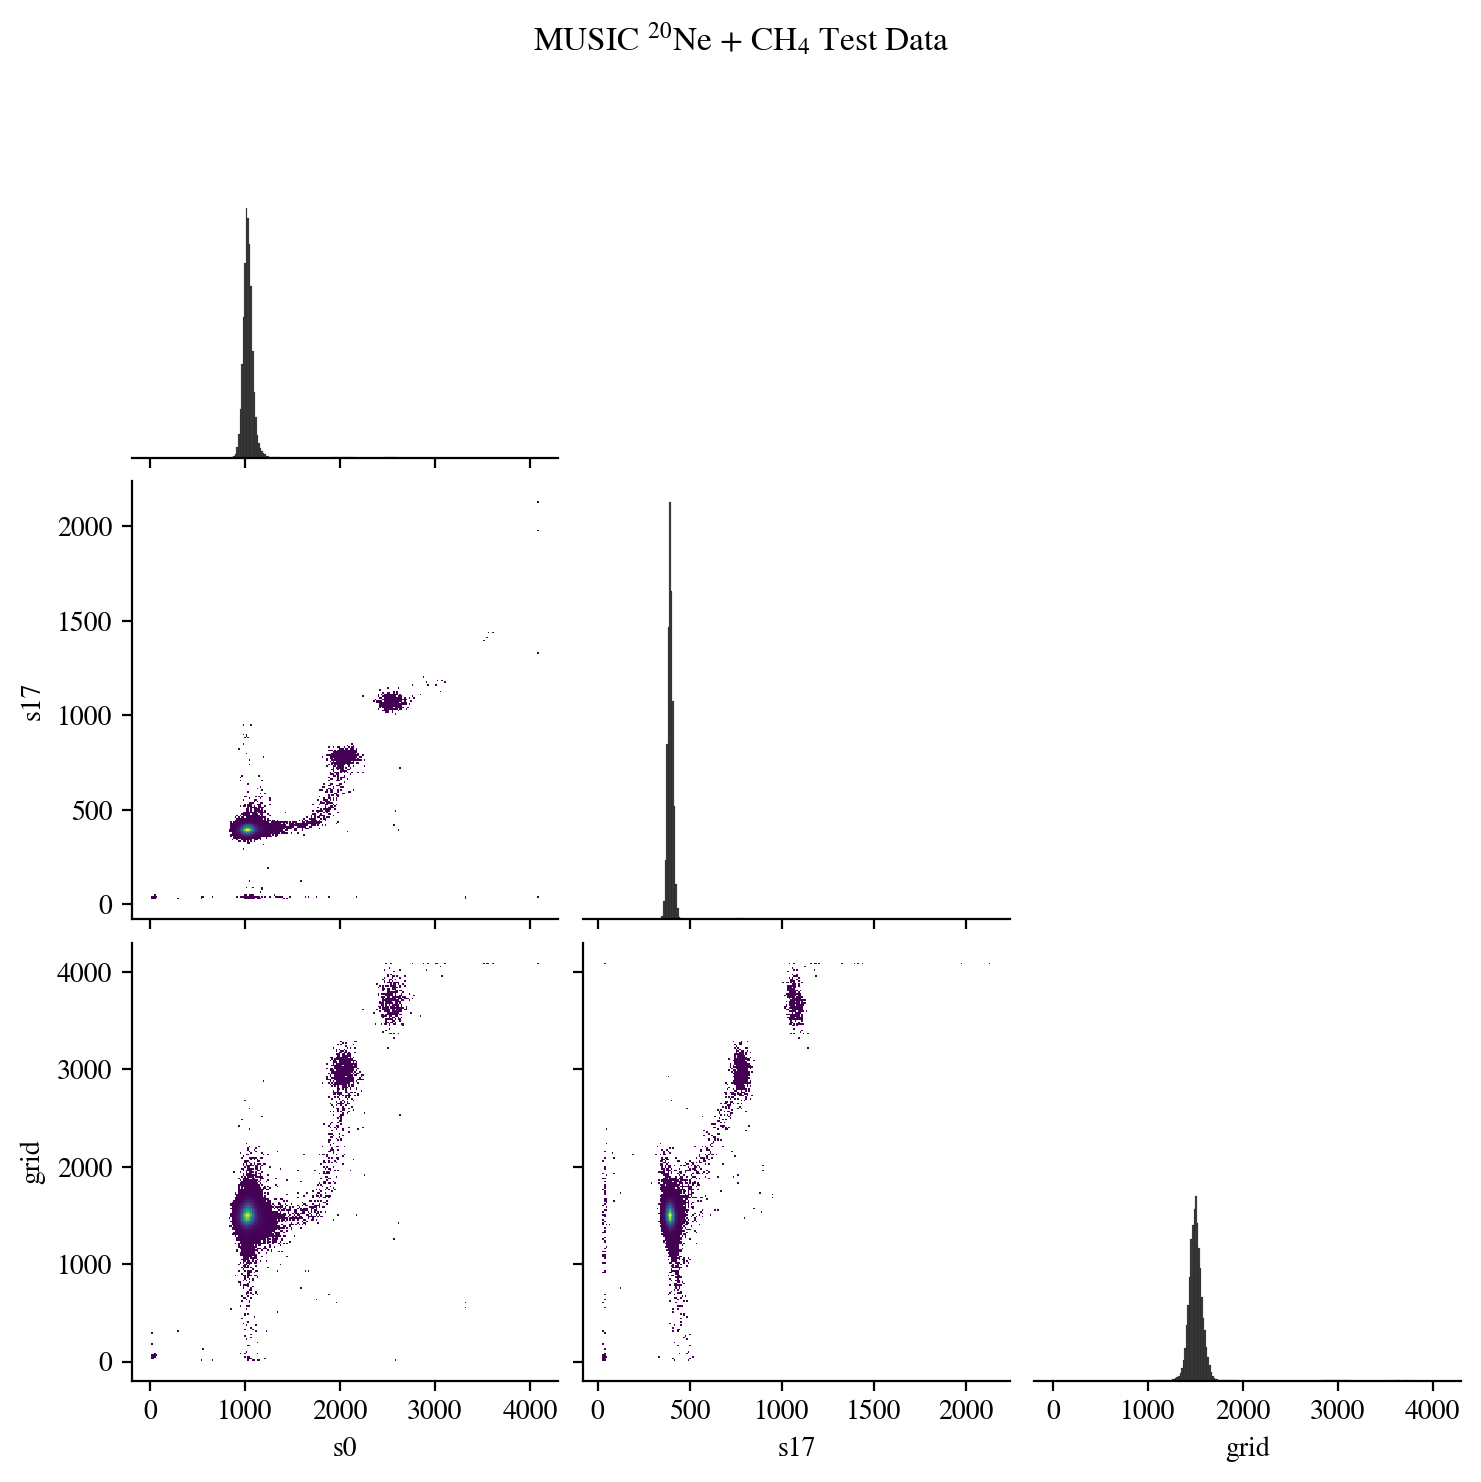

In [65]:
g = sns.pairplot(df, vars=['s0','s17','grid'],
                 kind='hist', 
                 corner=True,
                 plot_kws={'bins':250, 'cmap':'viridis'},
                 diag_kws={'bins':250, 'color':'black'})

g.figure.suptitle(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Data')

## Seaborn Ridge Plot Example

Finally, we will modify on of the seaborn examples to construct an interesting MUSIC plot. This code only needs to slightly modify the [ridgline plot example from the seaborn gallery](https://seaborn.pydata.org/examples/kde_ridgeplot.html) to plot KDE's of the segmented portion of the MUSIC anode. We transform the data into two columns, the first column is the $\Delta$E for each strip summed over the left and right segments, and the second column is an identifier which maps that particular $\Delta$E to which strip. Then some very minor edits of the seaborn example code generates our plot.

In [99]:
# Setup the data for the plot

df_dict = {}
for i in range(1,17):
    temp_dict = {r'$\Delta$E (Channel)':df[f's{i}L']+df[f's{i}R'], 'strip':np.tile(f'strip {i}', len(df.index))}
    df_dict.update({f'strip{i}':pd.DataFrame(temp_dict)})

df_ridge = pd.concat([value for value in df_dict.values()], axis=0)

df_ridge

,$\Delta$E (Channel),strip
0,416.0,strip 1
1,397.0,strip 1
2,426.0,strip 1
3,405.0,strip 1
4,393.0,strip 1
...,...,...
267824,498.0,strip 16
267825,517.0,strip 16
267826,497.0,strip 16
267827,442.0,strip 16


<div class="alert alert-block alert-info">
For certain multi-plots seaborn will print a userWarning if it needs to invoke a formating procedure (often turning on or turning off tight_layout()). This is a bug from the version of Matplotlib we are using, it does not change the output. Seaborn will print the warnings but it will still ultimatley generate your plot. However, the constant warnings printed as output in the notebook gets anoying. So, for this plot I have added two extra lines of code to suppress these warnings. Therefore after the below code completes (which will take some time) you should only see the resulting figure as an output.
</div>

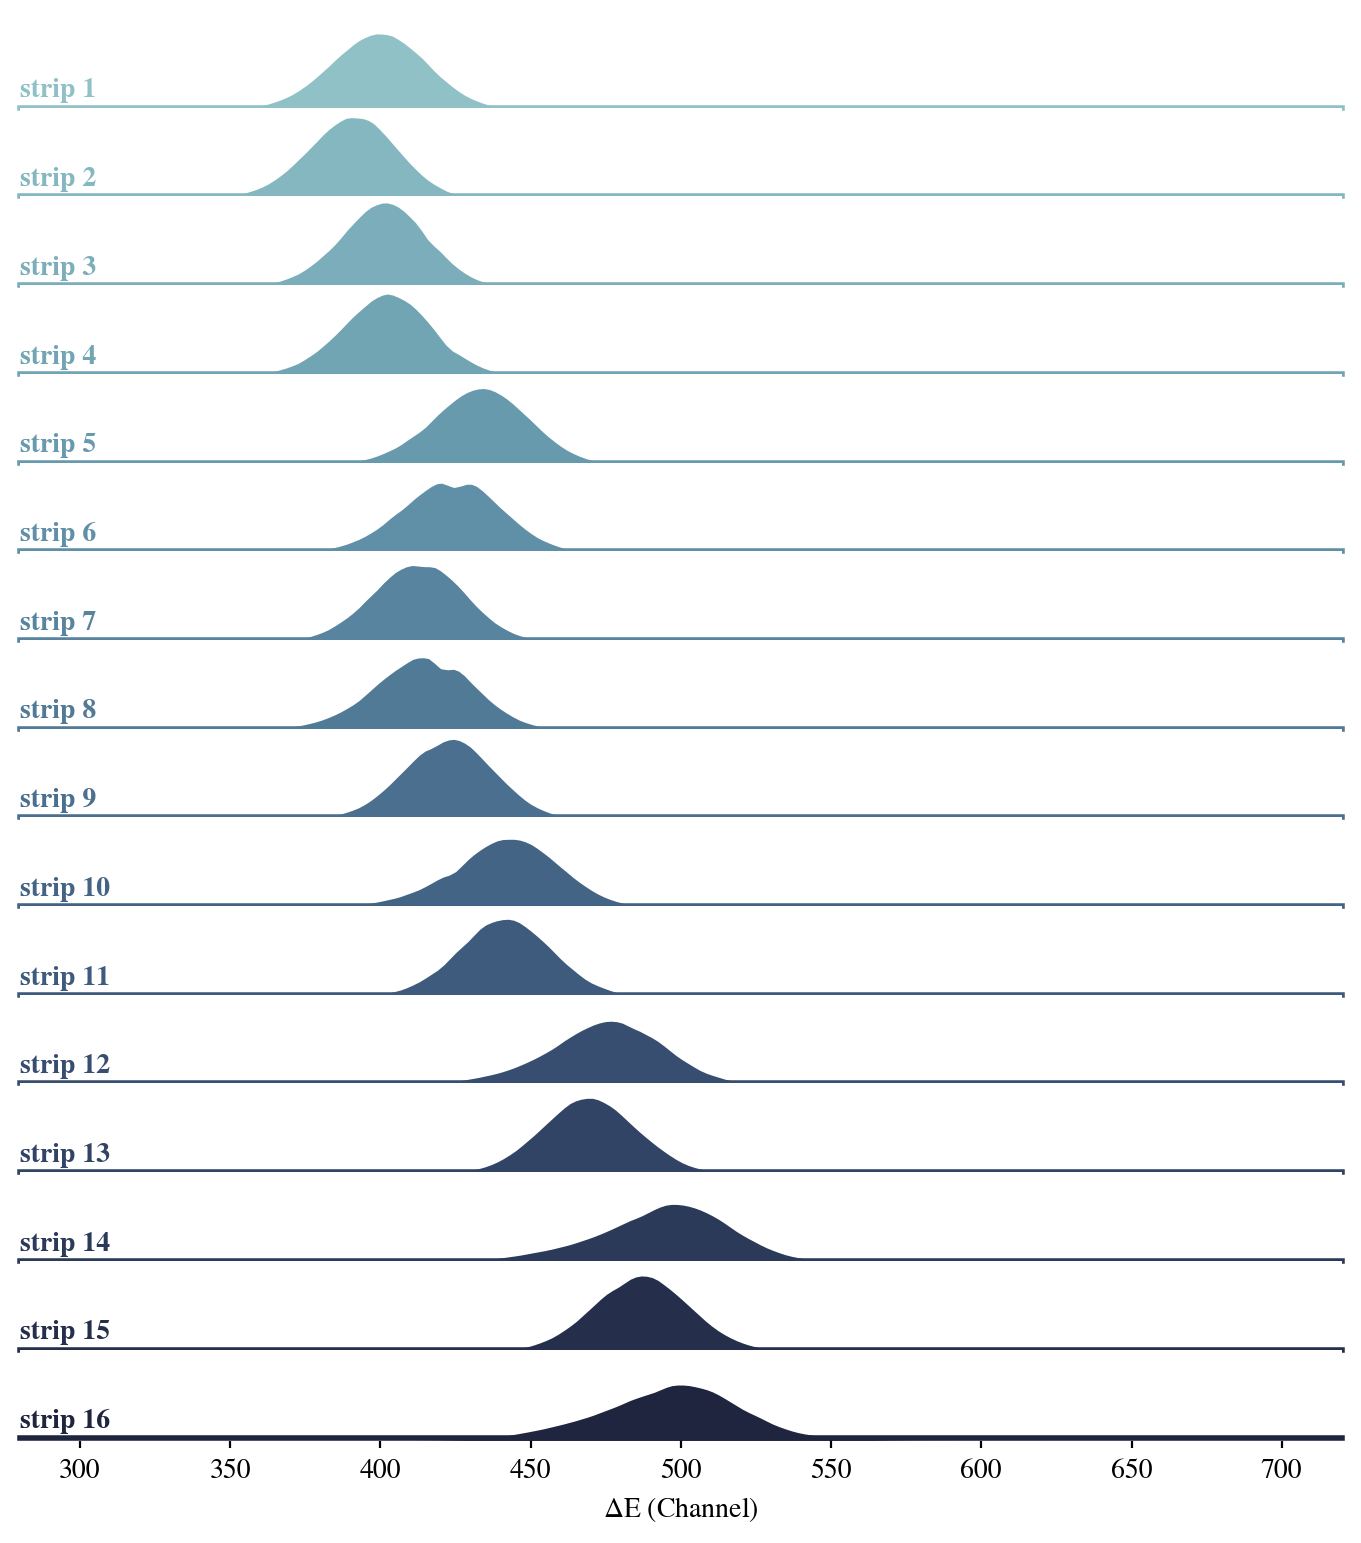

In [107]:
import warnings
warnings.filterwarnings('ignore')

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(16, rot=-.25, light=.7)
g = sns.FacetGrid(df_ridge, row='strip', hue='strip', aspect=15, height=.5, palette=pal)
# Draw the densities in a few steps
g.map(sns.kdeplot, r'$\Delta$E (Channel)',
      bw_adjust=.5,
      clip_on=False,
      clip=(300,700),
      fill=True, 
      alpha=1,
      linewidth=1.5)
g.map(sns.kdeplot, r'$\Delta$E (Channel)',
      clip_on=False,
      color="w",
      clip=(300,700),
      lw=2,
      bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color,
            ha='left', va='center', transform=ax.transAxes)

g.map(label, r'$\Delta$E (Channel)')

g.figure.subplots_adjust(hspace=0.00)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[], ylabel='')
g.despine(bottom=True, left=True)